In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from ray import tune
from ray.tune.schedulers import ASHAScheduler

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # In this example, we don't change the model architecture
        # due to simplicity.
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3)
        self.fc = nn.Linear(192, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 3))
        x = x.view(-1, 192)
        x = self.fc(x)
        out = F.log_softmax(x, dim=1)
        return out



# Change these values if you want the training to run quicker or slower.
EPOCH_SIZE = 512
TEST_SIZE = 256

def train(model, optimizer, train_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # We set this just for the example to run quickly.
        if batch_idx * len(data) > EPOCH_SIZE:
            return
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()


def test(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            # We set this just for the example to run quickly.
            if batch_idx * len(data) > TEST_SIZE:
                break
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return correct / total

def train_mnist(config):
    # Data Setup
    mnist_transforms = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.1307, ), (0.3081, ))])

    train_loader = DataLoader(
        datasets.MNIST("/Users/xichao.chen/Work/source/T-1000x/data", train=True, download=False, transform=mnist_transforms),
        batch_size=64,
        shuffle=True)
    test_loader = DataLoader(
        datasets.MNIST("/Users/xichao.chen/Work/source/T-1000x/data", train=False, download=False, transform=mnist_transforms),
        batch_size=64,
        shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ConvNet()
    model.to(device)

    optimizer = optim.SGD(
        model.parameters(), lr=config["lr"], momentum=config["momentum"])
    for i in range(50):
        train(model, optimizer, train_loader)
        acc = test(model, test_loader)

        # Send the current training result back to Tune
        tune.report(mean_accuracy=acc, hello="world")

        if i % 5 == 0:
            # This saves the model to the trial directory
            torch.save(model.state_dict(), "/Users/xichao.chen/Work/source/T-1000x/example/model.pth")

search_space = {
    "lr": tune.sample_from(lambda spec: 10**(-10 * np.random.rand())),
    "momentum": tune.uniform(0.1, 0.9)
}

# Uncomment this to enable distributed execution
# `ray.init(address="auto")`

# Download the dataset first
datasets.MNIST("/Users/xichao.chen/Work/source/T-1000x/data", train=True, download=False)



Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/xichao.chen/Work/source/T-1000x/data
    Split: Train

2021-03-23 18:34:45,999	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265
2021-03-23 18:34:47,679	WARNING function_runner.py:540 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,lr,momentum
train_mnist_63ff42c8,RUNNING,,1.09355,0.171042


Result for train_mnist_63ff42c8:
  date: 2021-03-23_18-34-49
  done: false
  experiment_id: 1c1d794b916c448c8802d604ac6e4786
  hello: world
  hostname: MacBook
  iterations_since_restore: 1
  mean_accuracy: 0.096875
  node_ip: 192.168.139.23
  pid: 51646
  time_since_restore: 0.42525577545166016
  time_this_iter_s: 0.42525577545166016
  time_total_s: 0.42525577545166016
  timestamp: 1616495689
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 63ff42c8
  
Result for train_mnist_64047108:
  date: 2021-03-23_18-34-49
  done: false
  experiment_id: 1b4b2c77c1914e8d8dd6dacc95d398d3
  hello: world
  hostname: MacBook
  iterations_since_restore: 1
  mean_accuracy: 0.065625
  node_ip: 192.168.139.23
  pid: 51647
  time_since_restore: 0.41170310974121094
  time_this_iter_s: 0.41170310974121094
  time_total_s: 0.41170310974121094
  timestamp: 1616495689
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '64047108'
  
Result for train_mnist_6405ef42:
  date: 2021-03-2

Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_63ff42c8,RUNNING,192.168.139.23:51646,1.09355,0.171042,0.078125,11,3.86937
train_mnist_64047108,RUNNING,192.168.139.23:51647,1.09348,0.583,0.09375,10,3.52149
train_mnist_6405ef42,RUNNING,192.168.139.23:51643,1.00301,0.883224,0.0625,10,3.58769
train_mnist_640768fe,RUNNING,192.168.139.23:51640,1.07502,0.695478,0.08125,10,3.52196
train_mnist_640934c2,RUNNING,192.168.139.23:51644,1.04661,0.322698,0.109375,10,3.53791
train_mnist_64147f8a,RUNNING,192.168.139.23:51639,1.04298,0.306865,0.125,10,3.52835
train_mnist_641636f4,RUNNING,192.168.139.23:51637,1.03008,0.289901,0.09375,10,3.51772
train_mnist_641856a0,RUNNING,192.168.139.23:51638,1.08908,0.169401,0.09375,10,3.5132
train_mnist_641a1594,RUNNING,192.168.139.23:51641,1.01336,0.647259,0.1125,10,3.53534
train_mnist_641bea2c,RUNNING,192.168.139.23:51642,1.09778,0.5426,0.096875,10,3.54881


Result for train_mnist_63ff42c8:
  date: 2021-03-23_18-34-54
  done: false
  experiment_id: 1c1d794b916c448c8802d604ac6e4786
  hello: world
  hostname: MacBook
  iterations_since_restore: 16
  mean_accuracy: 0.121875
  node_ip: 192.168.139.23
  pid: 51646
  time_since_restore: 5.585384845733643
  time_this_iter_s: 0.35522890090942383
  time_total_s: 5.585384845733643
  timestamp: 1616495694
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 63ff42c8
  
Result for train_mnist_64047108:
  date: 2021-03-23_18-34-54
  done: false
  experiment_id: 1b4b2c77c1914e8d8dd6dacc95d398d3
  hello: world
  hostname: MacBook
  iterations_since_restore: 16
  mean_accuracy: 0.08125
  node_ip: 192.168.139.23
  pid: 51647
  time_since_restore: 5.566323280334473
  time_this_iter_s: 0.34672021865844727
  time_total_s: 5.566323280334473
  timestamp: 1616495694
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: '64047108'
  
Result for train_mnist_640768fe:
  date: 2021-03-23_18-

Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_63ff42c8,RUNNING,192.168.139.23:51646,1.09355,0.171042,0.0875,25,8.67425
train_mnist_64047108,RUNNING,192.168.139.23:51647,1.09348,0.583,0.05625,25,8.64727
train_mnist_6405ef42,RUNNING,192.168.139.23:51643,1.00301,0.883224,0.090625,24,8.4417
train_mnist_640768fe,RUNNING,192.168.139.23:51640,1.07502,0.695478,0.103125,25,8.74888
train_mnist_640934c2,RUNNING,192.168.139.23:51644,1.04661,0.322698,0.109375,25,8.60819
train_mnist_64147f8a,RUNNING,192.168.139.23:51639,1.04298,0.306865,0.071875,24,8.37757
train_mnist_641636f4,RUNNING,192.168.139.23:51637,1.03008,0.289901,0.103125,25,8.63041
train_mnist_641856a0,RUNNING,192.168.139.23:51638,1.08908,0.169401,0.109375,25,8.63835
train_mnist_641a1594,RUNNING,192.168.139.23:51641,1.01336,0.647259,0.10625,24,8.35401
train_mnist_641bea2c,RUNNING,192.168.139.23:51642,1.09778,0.5426,0.1,24,8.33819


Result for train_mnist_64047108:
  date: 2021-03-23_18-34-59
  done: false
  experiment_id: 1b4b2c77c1914e8d8dd6dacc95d398d3
  hello: world
  hostname: MacBook
  iterations_since_restore: 31
  mean_accuracy: 0.096875
  node_ip: 192.168.139.23
  pid: 51647
  time_since_restore: 10.704968214035034
  time_this_iter_s: 0.3397250175476074
  time_total_s: 10.704968214035034
  timestamp: 1616495699
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: '64047108'
  
Result for train_mnist_63ff42c8:
  date: 2021-03-23_18-34-59
  done: false
  experiment_id: 1c1d794b916c448c8802d604ac6e4786
  hello: world
  hostname: MacBook
  iterations_since_restore: 31
  mean_accuracy: 0.121875
  node_ip: 192.168.139.23
  pid: 51646
  time_since_restore: 10.743729829788208
  time_this_iter_s: 0.3296337127685547
  time_total_s: 10.743729829788208
  timestamp: 1616495699
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: 63ff42c8
  
Result for train_mnist_640934c2:
  date: 2021-03-23_

Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_63ff42c8,RUNNING,192.168.139.23:51646,1.09355,0.171042,0.1,39,13.5845
train_mnist_64047108,RUNNING,192.168.139.23:51647,1.09348,0.583,0.115625,39,13.5386
train_mnist_6405ef42,RUNNING,192.168.139.23:51643,1.00301,0.883224,0.065625,39,13.7754
train_mnist_640768fe,RUNNING,192.168.139.23:51640,1.07502,0.695478,0.10625,39,13.7493
train_mnist_640934c2,RUNNING,192.168.139.23:51644,1.04661,0.322698,0.1,39,13.5612
train_mnist_64147f8a,RUNNING,192.168.139.23:51639,1.04298,0.306865,0.109375,39,13.6834
train_mnist_641636f4,RUNNING,192.168.139.23:51637,1.03008,0.289901,0.090625,39,13.6044
train_mnist_641856a0,RUNNING,192.168.139.23:51638,1.08908,0.169401,0.10625,39,13.5339
train_mnist_641a1594,RUNNING,192.168.139.23:51641,1.01336,0.647259,0.115625,38,13.3352
train_mnist_641bea2c,RUNNING,192.168.139.23:51642,1.09778,0.5426,0.0875,38,13.3358


Result for train_mnist_640768fe:
  date: 2021-03-23_18-35-04
  done: false
  experiment_id: eea9e4417cfe49e0bbbe4fb925bce5aa
  hello: world
  hostname: MacBook
  iterations_since_restore: 45
  mean_accuracy: 0.128125
  node_ip: 192.168.139.23
  pid: 51640
  time_since_restore: 15.898766994476318
  time_this_iter_s: 0.3597538471221924
  time_total_s: 15.898766994476318
  timestamp: 1616495704
  timesteps_since_restore: 0
  training_iteration: 45
  trial_id: 640768fe
  
Result for train_mnist_641636f4:
  date: 2021-03-23_18-35-04
  done: false
  experiment_id: ab04bebf6e184c908738a97e069096d4
  hello: world
  hostname: MacBook
  iterations_since_restore: 45
  mean_accuracy: 0.1
  node_ip: 192.168.139.23
  pid: 51637
  time_since_restore: 15.765224933624268
  time_this_iter_s: 0.35867810249328613
  time_total_s: 15.765224933624268
  timestamp: 1616495704
  timesteps_since_restore: 0
  training_iteration: 45
  trial_id: 641636f4
  
Result for train_mnist_64047108:
  date: 2021-03-23_18-35-

Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_63ff42c8,TERMINATED,,1.09355,0.171042,0.115625,50,17.4906
train_mnist_64047108,TERMINATED,,1.09348,0.583,0.1125,50,17.374
train_mnist_6405ef42,TERMINATED,,1.00301,0.883224,0.11875,50,17.6508
train_mnist_640768fe,TERMINATED,,1.07502,0.695478,0.1125,50,17.6564
train_mnist_640934c2,TERMINATED,,1.04661,0.322698,0.11875,50,17.4218
train_mnist_64147f8a,TERMINATED,,1.04298,0.306865,0.075,50,17.5071
train_mnist_641636f4,TERMINATED,,1.03008,0.289901,0.096875,50,17.5064
train_mnist_641856a0,TERMINATED,,1.08908,0.169401,0.1,50,17.3727
train_mnist_641a1594,TERMINATED,,1.01336,0.647259,0.121875,50,17.543
train_mnist_641bea2c,TERMINATED,,1.09778,0.5426,0.10625,50,17.5511


2021-03-23 18:35:06,805	INFO tune.py:450 -- Total run time: 21.28 seconds (19.02 seconds for the tuning loop).


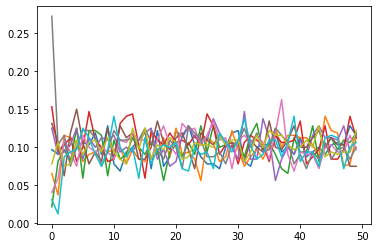

In [2]:
from hyperopt import hp
from ray.tune.suggest.hyperopt import HyperOptSearch

space = {
    "lr": hp.loguniform("lr", 1e-10, 0.1),
    "momentum": hp.uniform("momentum", 0.1, 0.9),
}

hyperopt_search = HyperOptSearch(space, metric="mean_accuracy", mode="max")

analysis = tune.run(train_mnist, num_samples=10, search_alg=hyperopt_search)

# Obtain a trial dataframe from all run trials of this `tune.run` call.
dfs = analysis.trial_dataframes

# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.mean_accuracy.plot(ax=ax, legend=False)